Lesson 13

Author: Rodrigo MM Santiago @rodrigommsantiago

In [1]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# inline plotting
%matplotlib inline

# Correlation function
from scipy.signal import correlate

# Z-Score function
from scipy.stats import zscore

# loading Matlab data
from scipy.io import loadmat

Autocorrelation:

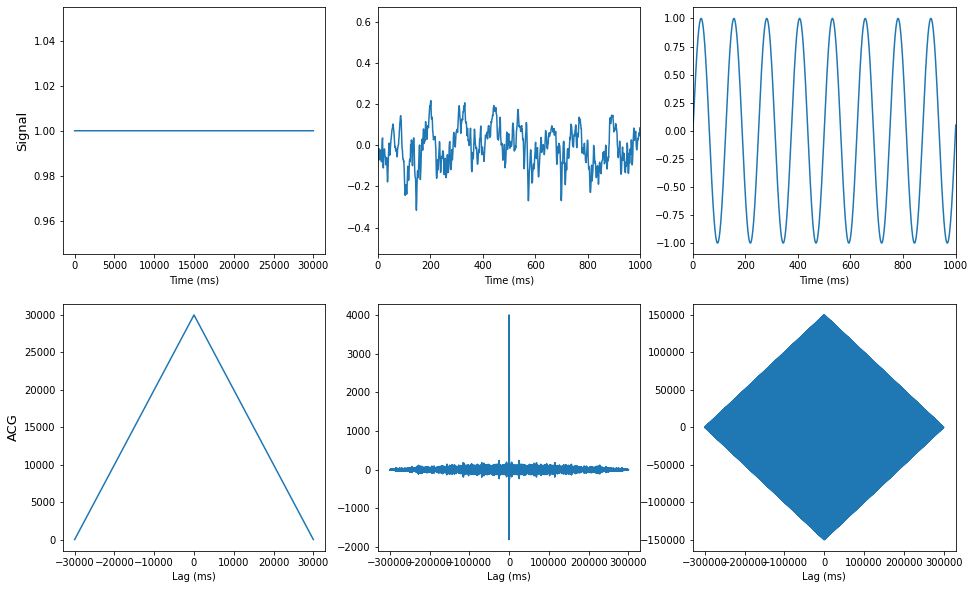

In [2]:
data = loadmat('LFP_HG_HFO.mat')
lfpHG = data['lfpHG'][0]
lfpHFO = data['lfpHFO'][0]

srate = 1000
dt = 1./srate
t = dt*(np.arange(len(lfpHG)))

plt.figure(figsize=(16,10))
plt.subplot(231)
# X = np.random.randn(3000)
X = np.ones(30000)
plt.plot(X)
plt.ylabel('Signal',size=13)
plt.xlabel('Time (ms)')

plt.subplot(234)
plt.ylabel('ACG',size=13)
ACG = correlate(X,X)
plt.plot(np.arange(-len(X)+1,len(X)),ACG)
plt.xlabel('Lag (ms)')

plt.subplot(232)
plt.plot(lfpHFO)
plt.xlim([0,1000])
plt.xlabel('Time (ms)')

plt.subplot(235)
ACG = correlate(lfpHFO,lfpHFO)
plt.plot(np.arange(-len(lfpHFO)+1,len(lfpHFO)),ACG)
plt.xlabel('Lag (ms)');

plt.subplot(233)
LFP = np.sin(2*np.pi*8*t)
plt.plot(LFP)
plt.xlim([0,1000])
plt.xlabel('Time (ms)')

plt.subplot(236)
ACG = correlate(LFP,LFP)
plt.plot(np.arange(-len(LFP)+1,len(LFP)),ACG)
plt.xlabel('Lag (ms)');

Cross-correlation:

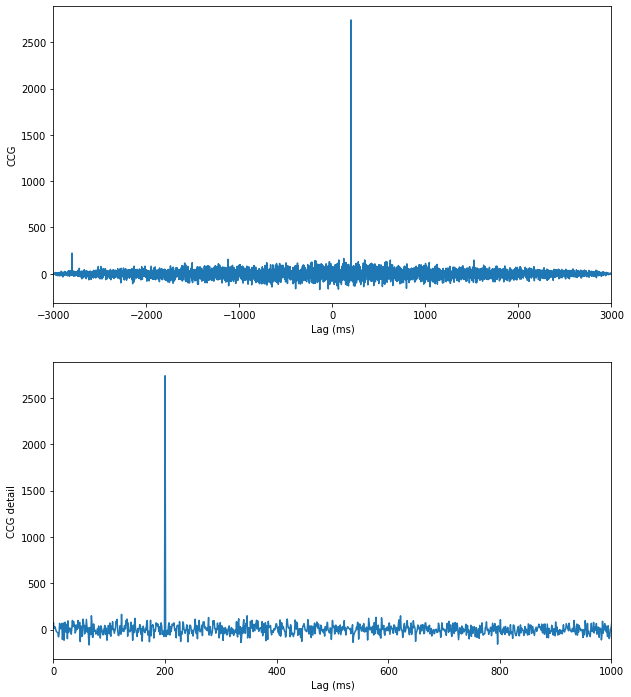

In [3]:
X = np.random.randn(3000)
Y = np.roll(X,200)

plt.figure(figsize=(10,12))
plt.subplot(211)
CCG = correlate(Y,X)
plt.plot(np.arange(-len(Y)+1,len(Y)),CCG)
plt.xlabel('Lag (ms)')
plt.ylabel('CCG')
plt.xlim(-3000,3000)

plt.subplot(212)
plt.plot(np.arange(-len(Y)+1,len(Y)),CCG)
plt.xlabel('Lag (ms)')
plt.ylabel('CCG detail')
plt.xlim(0,1000);

Finding peak CCG value:

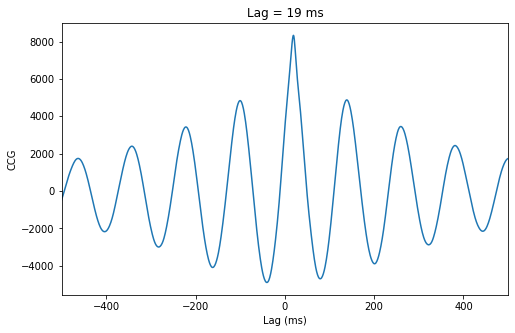

In [4]:
CCG = correlate(np.roll(lfpHFO,20),lfpHG)
lags = np.arange(-len(lfpHG)+1,len(lfpHG))

plt.figure(figsize=(8,5))
plt.plot(lags,CCG)
plt.xlabel('Lag (ms)')
plt.ylabel('CCG')
plt.xlim(-500,500)
m = np.max(CCG)
ind = np.argmax(CCG)
plt.title('Lag = '+str(lags[ind])+' ms');

CCG normalization (using Y scale as correlation coefficients):

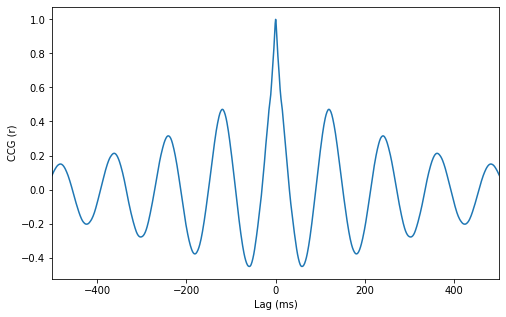

In [5]:
CCG = correlate(zscore(lfpHFO),zscore(lfpHFO))
lags = np.arange(-len(lfpHFO)+1,len(lfpHFO))

plt.figure(figsize=(8,5))
plt.plot(lags,CCG/len(lfpHG))
plt.xlabel('Lag (ms)')
plt.ylabel('CCG (r)')
plt.xlim(-500,500);

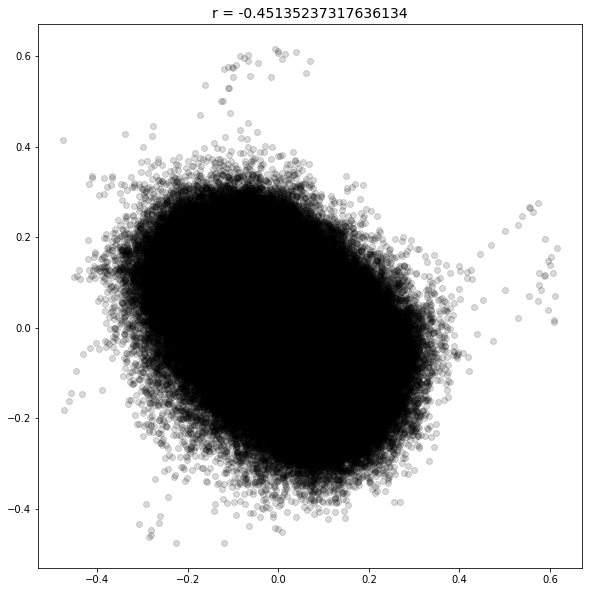

In [6]:
plt.figure(figsize=(10,10))
plt.plot(lfpHFO[:-60],lfpHFO[60:],'ko',alpha=0.15)
plt.axis('square')

r = np.corrcoef(lfpHFO[:-60],lfpHFO[60:])
plt.title('r = '+str(r[0,1]),size=14);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


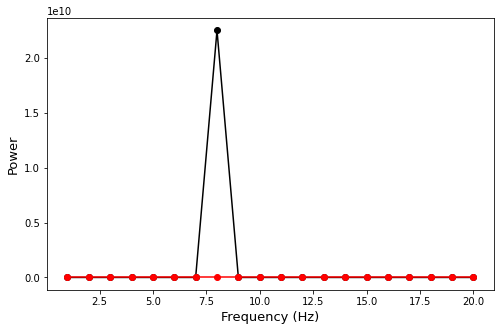

In [7]:
ACG = correlate(LFP,LFP)
lags = np.arange(-len(LFP)+1,len(LFP))
# the Power spectrum is equivalent to the Fourier transform of the ACG
PSD = np.empty(20)
for f in range(1,21):
    PSD[f-1] = np.sum(ACG*np.exp(-1j*2*np.pi*f*lags/1000.))

# Power values are on the real axis of the Fourier transform
plt.figure(figsize=(8,5))
plt.plot(range(1,21),np.real(PSD),'ko-')
plt.plot(range(1,21),np.imag(PSD),'ro-')
plt.xlabel('Frequency (Hz)',size=13)
plt.ylabel('Power',size=13);